In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("./fuel-econ.csv")

In [3]:
df.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


In [4]:
df.shape

(3929, 20)

In [7]:
df.isnull().isnull().sum()

id           0
make         0
model        0
year         0
VClass       0
drive        0
trans        0
fuelType     0
cylinders    0
displ        0
pv2          0
pv4          0
city         0
UCity        0
highway      0
UHighway     0
comb         0
co2          0
feScore      0
ghgScore     0
dtype: int64

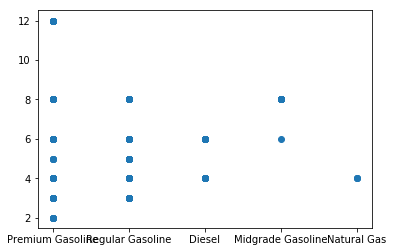

In [11]:
plt.scatter(data =df, x='fuelType', y='cylinders')


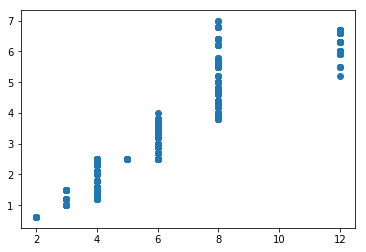

In [13]:
plt.scatter(data = df, x= "cylinders", y= "displ")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


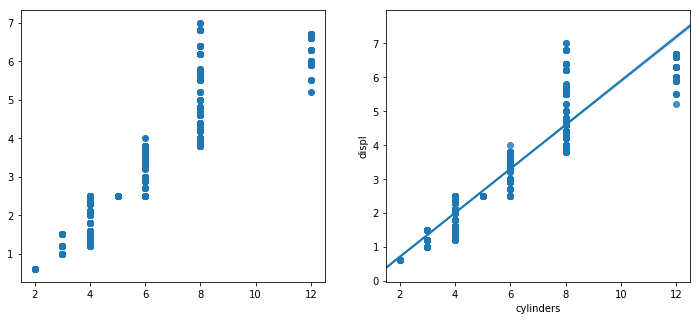

In [16]:
plt.figure(figsize = [12, 5])
# left plot: matplot scatterplot 
plt.subplot(1,2,1)
plt.scatter(data = df, x= "cylinders", y= "displ")
#right plot seborn plot sb.regplot
plt.subplot(1,2,2)
sb.regplot(data = df, x= "cylinders", y= "displ")


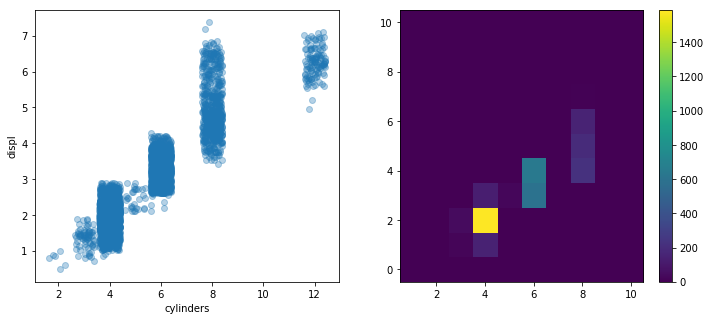

In [21]:
plt.figure(figsize = [12, 5])
# left plot:  scatterplot with jitter and transperency
plt.subplot(1,2,1)
sb.regplot(data = df, x= "cylinders", y= "displ", fit_reg= False,
           x_jitter=0.4, y_jitter=0.4, scatter_kws = {"alpha" :1/3})
#right plot - heat map
plt.subplot(1,2,2)
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df, x="cylinders", y="displ", bins =[bins_x, bins_y])
plt.colorbar();


In [ ]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
h2d = plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Violinplots ##


In [22]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [23]:
df["VClass"].unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [26]:
sedan_classes = ['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars','Minicompact Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
df["VClass"] = df["VClass"].astype(vclasses);


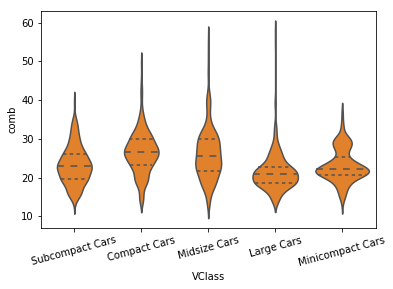

In [33]:

sb.violinplot(data = df, x = 'VClass', y = 'comb', inner= 'quartile', color=sb.color_palette()[1])
plt.xticks(rotation=15);

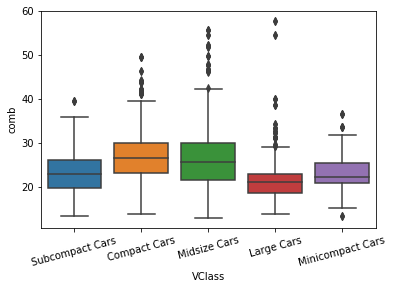

In [35]:
##Box plots
sb.boxplot(data = df, x='VClass', y ='comb')
plt.xticks(rotation=15);

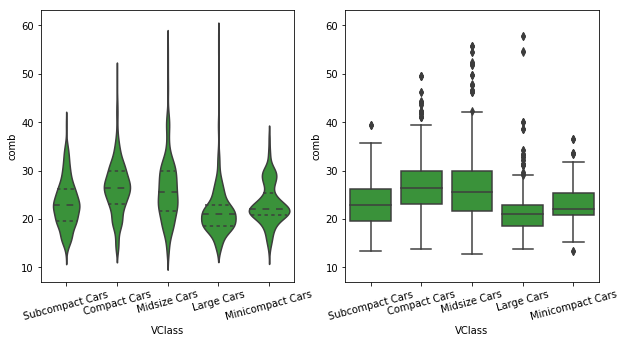

In [40]:
plt.figure(figsize= [10,5])
#left plot as violin
base_color = sb.color_palette()[2]
plt.subplot(1,2,1)
ax1 = sb.violinplot(data = df, x = 'VClass', y = 'comb', inner= 'quartile', color=base_color)
plt.xticks(rotation=15);

#right plot as box
plt.subplot(1,2,2)
sb.boxplot(data = df, x='VClass', y ='comb', color = base_color)
#to have both plot similar axis
plt.ylim(ax1.get_ylim()) 
plt.xticks(rotation=15);

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.